# Tokyo Airbnb Data Analysis 

This is a project of Udacity's Data scientist nanodegree

The three questions are as follows
1. What are the most 5 expensive and inexpensive neighbourhoods in Tokyo 
2. What are the types of properties available in top 5 expensive and inexpensive neighbourhoods of Tokyo 
3. What are the average price of types of properties in the top 5 expensive and inexpensive neighbourhood of Tokyo

In [3]:
import numpy as np
import pandas as pd
import array
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [41]:
df = pd.read_csv('dataset/may_2019/listings.csv')
df_price = df

/home/zmp/anaconda3/envs/airbnb_tokyo/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data cleaning 

In [26]:
df_price['price']=df['price'].str.replace('$','')
df_price['price']=df['price'].str.replace(',','')
# df_listings['price']=df_listings['price'].str.replace(array(',','$'),array('')
df_price['price']=df['price'].apply(pd.to_numeric)

# The 5 most expensive neighbourhood in Tokyo

In [104]:
neighb_mean_price = df_price.groupby('neighbourhood').mean()['price'].sort_values(ascending=False).reset_index()
neighb_mean_price.head(5)

,neighbourhood,price
0,Chiyoda District,43196.463687
1,Akihabara,27653.000000
2,Shibuya,21047.058252
3,Shibuya District,19932.877971
4,Nakameguro,19510.000000


# The 5 most cheapest neighbourhood in Tokyo

In [105]:
neighb_mean_price = df_price.groupby('neighbourhood').mean()['price'].sort_values(ascending=True).reset_index()
neighb_mean_price.head(5)

,neighbourhood,price
0,Shiodome,4870.222222
1,Marunouchi,5793.000000
2,Nerima District,6902.953125
3,Roppongi Hills,6995.000000
4,Tsukishima,8224.833333


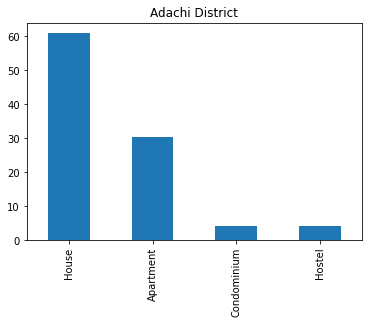

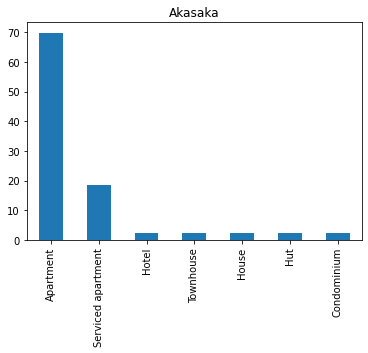

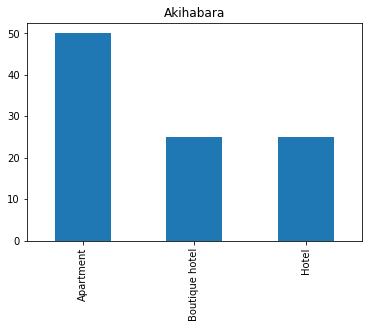

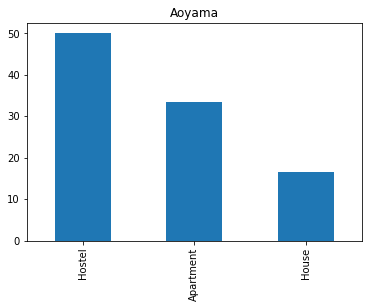

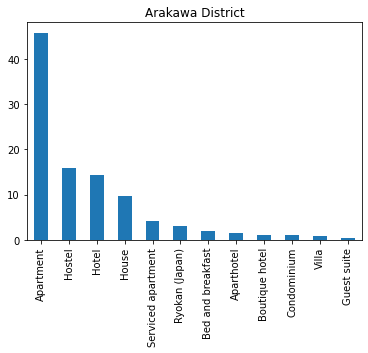

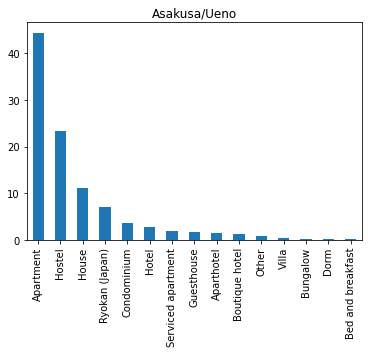

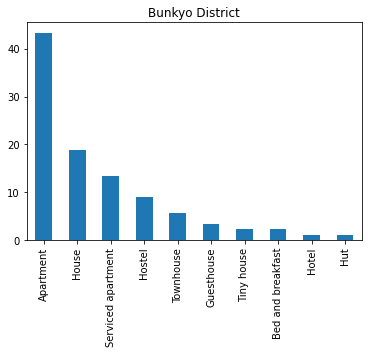

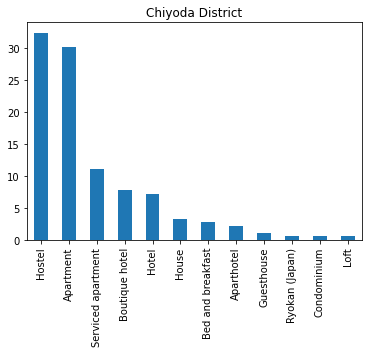

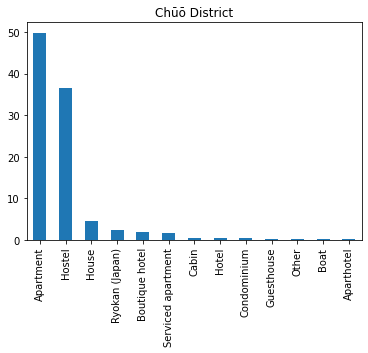

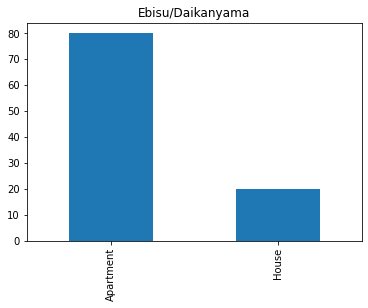

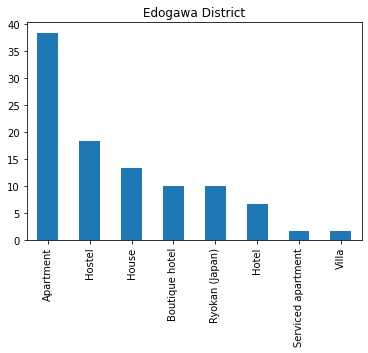

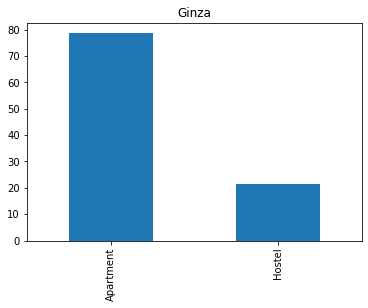

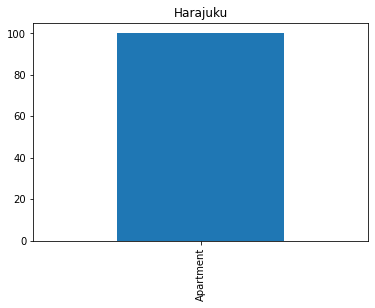

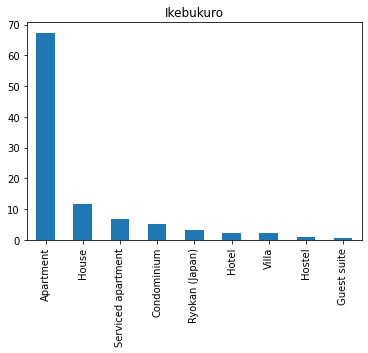

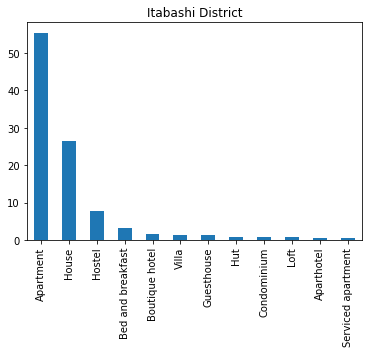

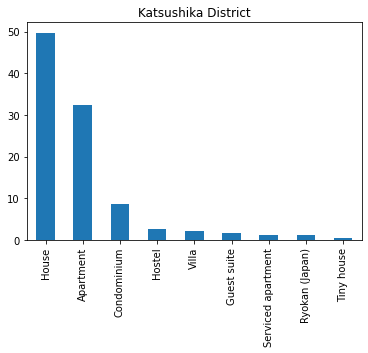

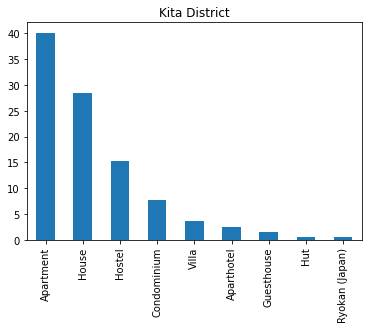

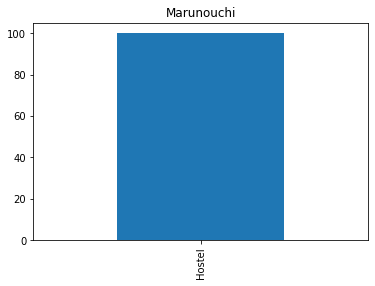

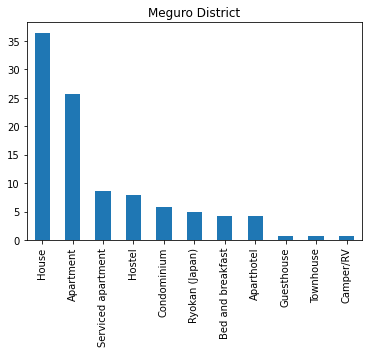

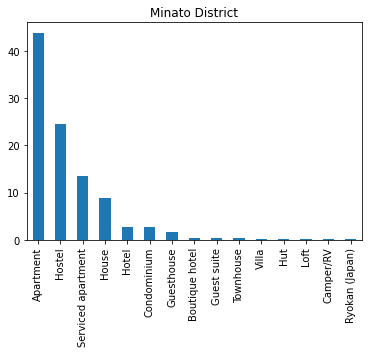

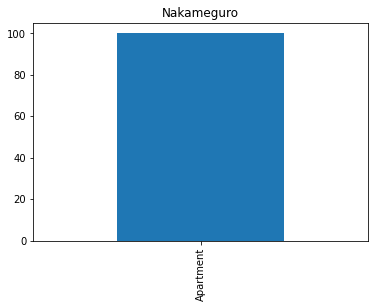

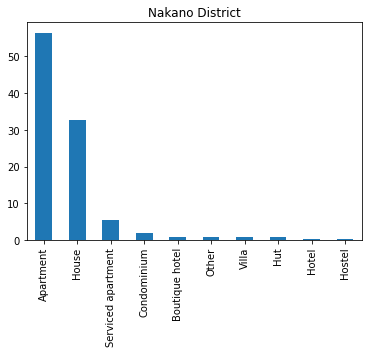

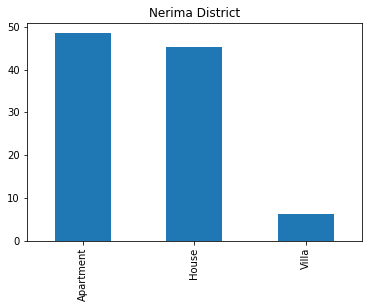

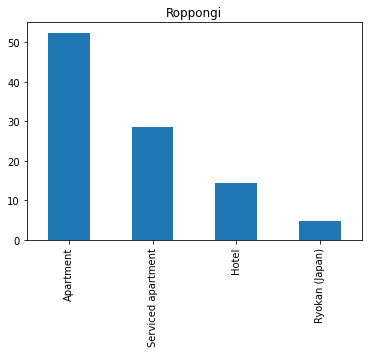

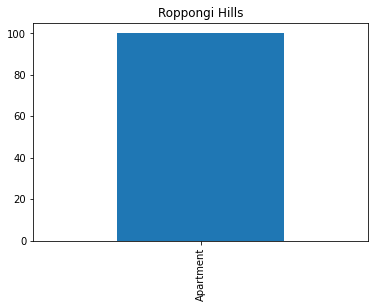

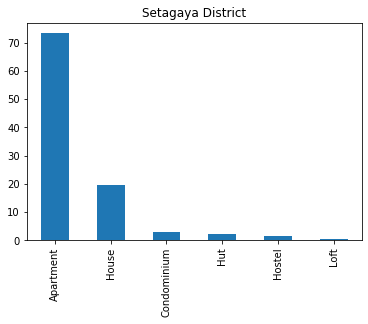

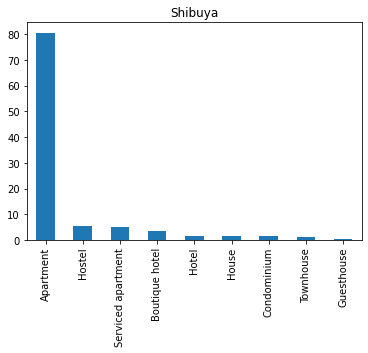

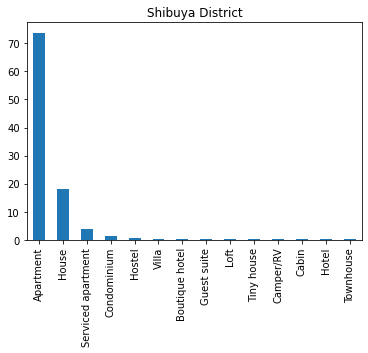

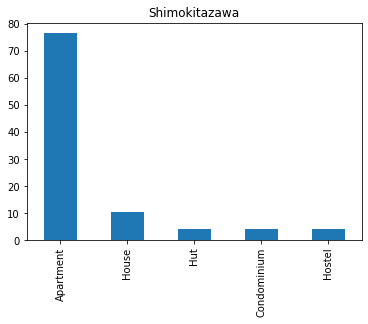

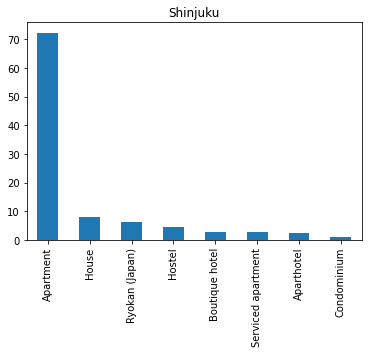

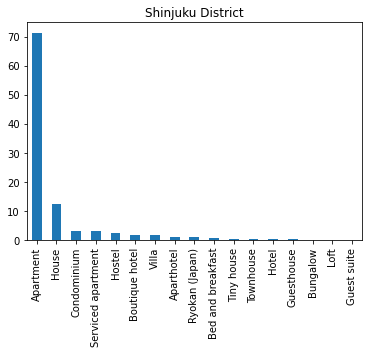

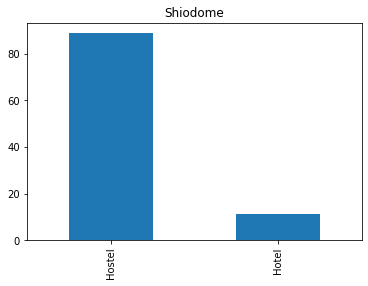

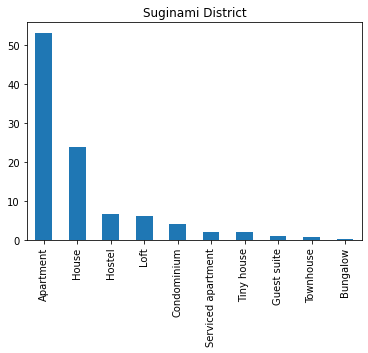

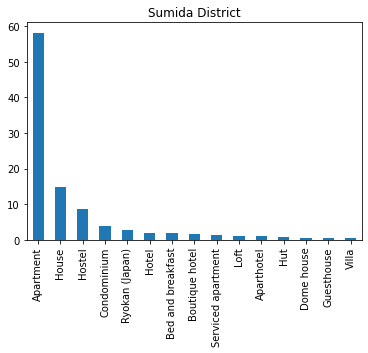

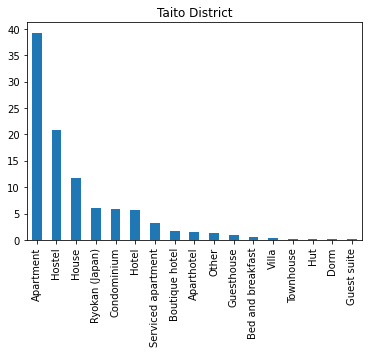

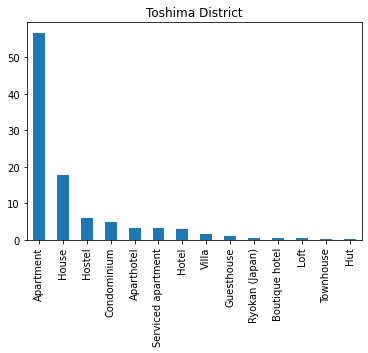

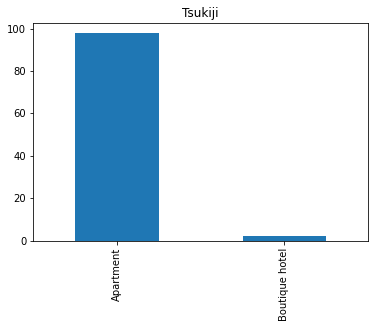

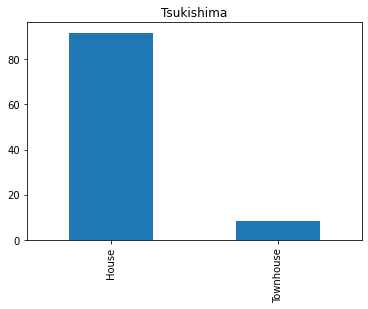

In [95]:
types_of_accomdation=df_price.groupby('neighbourhood')
for group_name, df_group in types_of_accomdation:
    plt.figure()
    plt.title(group_name)
    l=types_of_accomdation.get_group(group_name)['property_type']
    ((l.value_counts())/(len(l))*100).plot(kind='bar')
    plt.show() 

In [96]:
grouped_multiple = df_price.groupby(['neighbourhood','property_type']).agg({'price':['mean']})
grouped_multiple.columns=['mean price']
grouped_multiple = grouped_multiple.reset_index()
t=grouped_multiple.groupby('neighbourhood')

/home/zmp/anaconda3/envs/airbnb_tokyo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


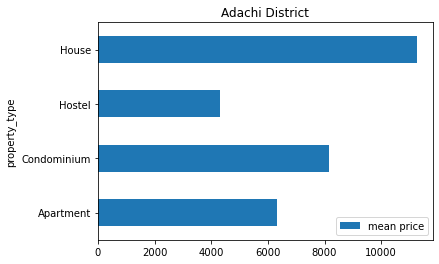

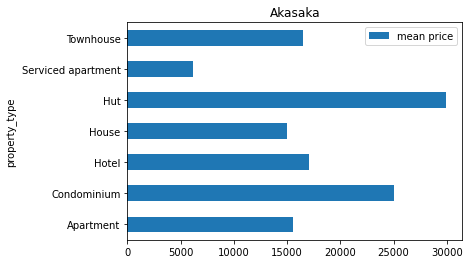

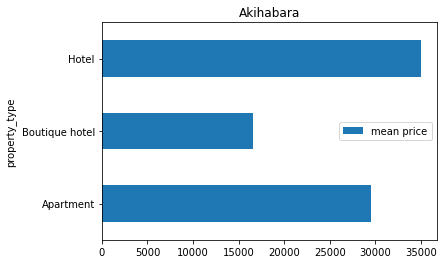

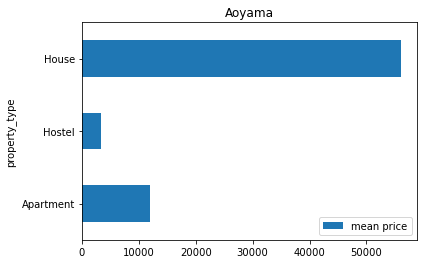

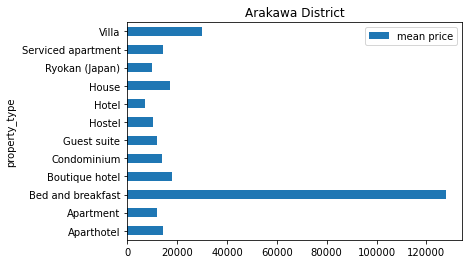

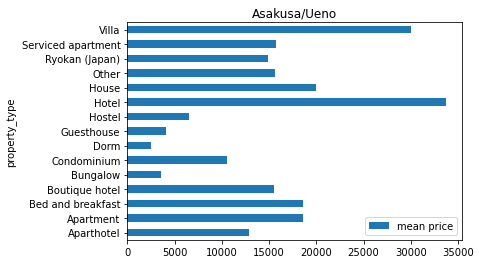

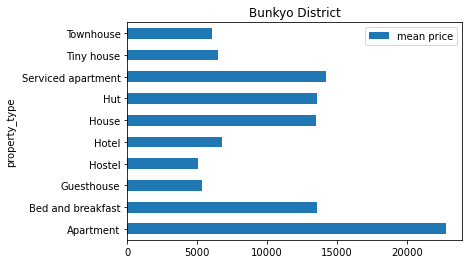

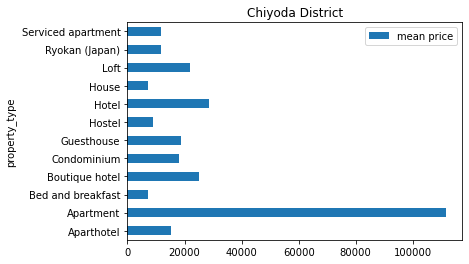

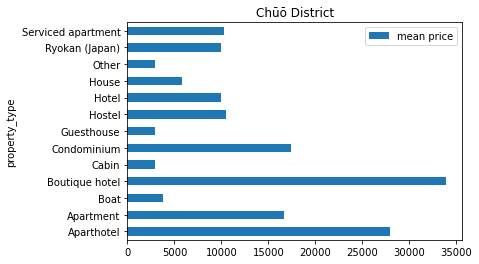

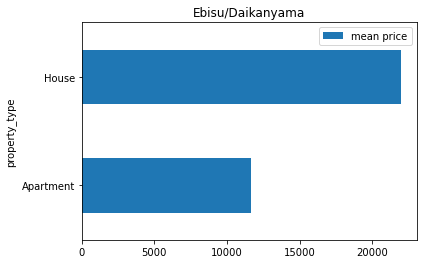

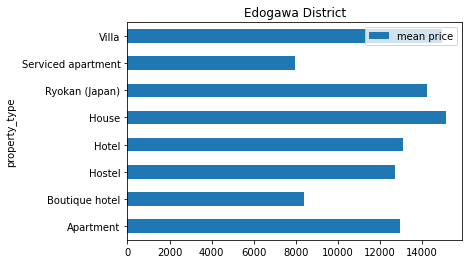

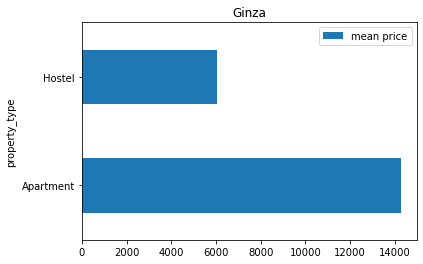

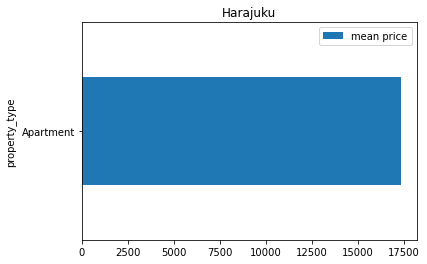

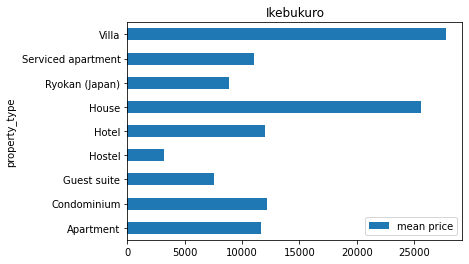

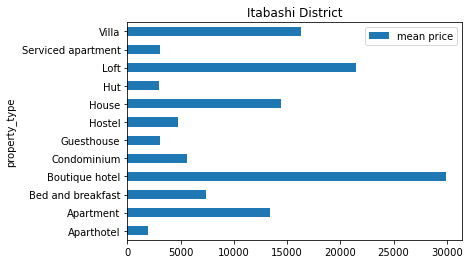

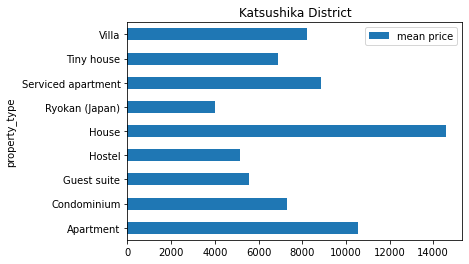

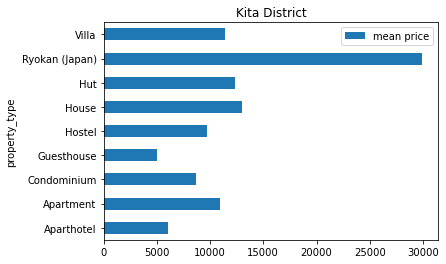

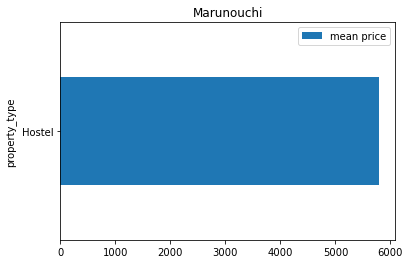

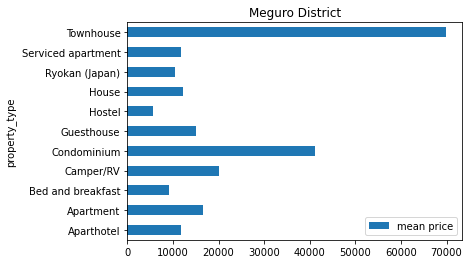

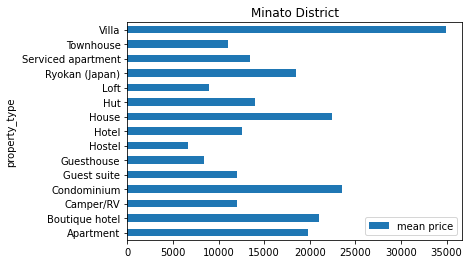

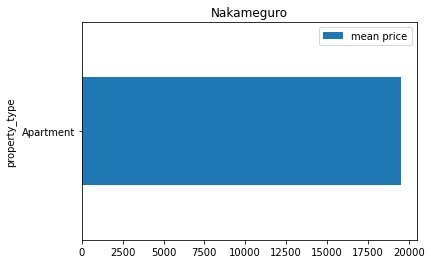

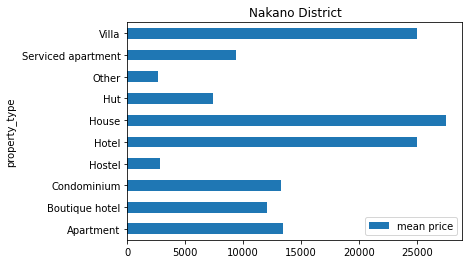

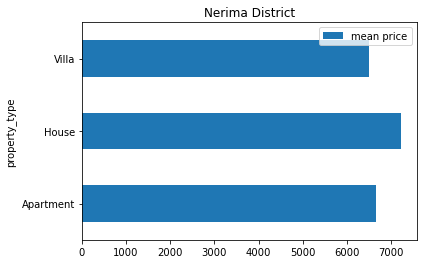

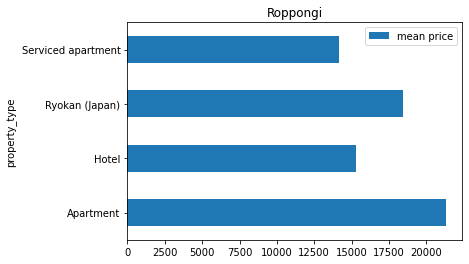

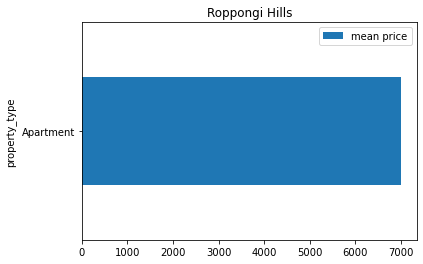

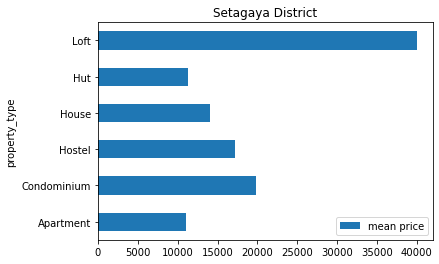

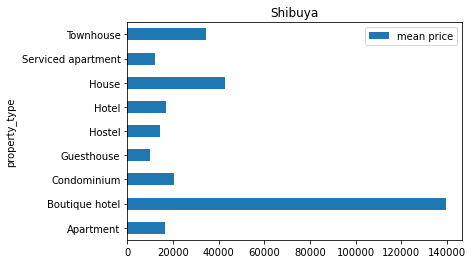

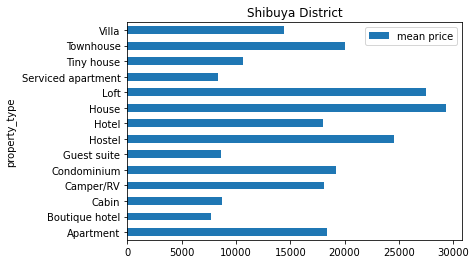

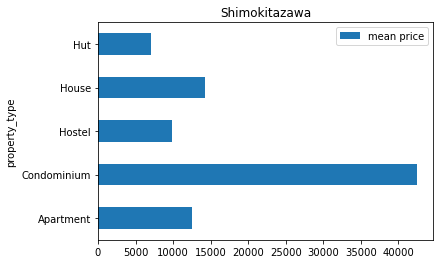

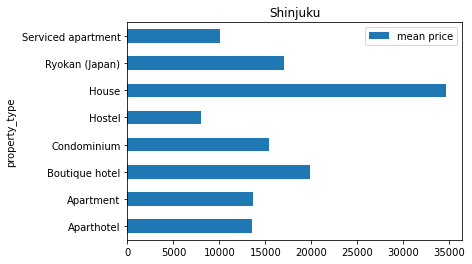

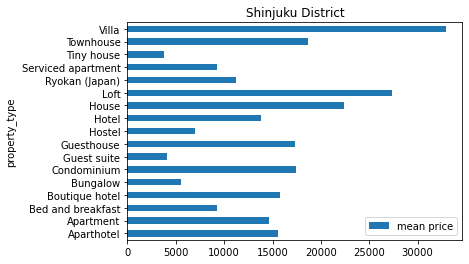

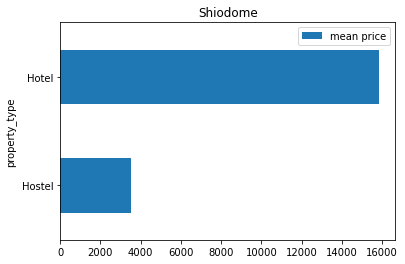

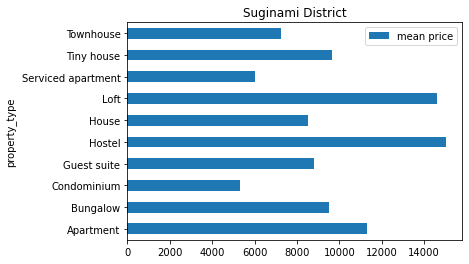

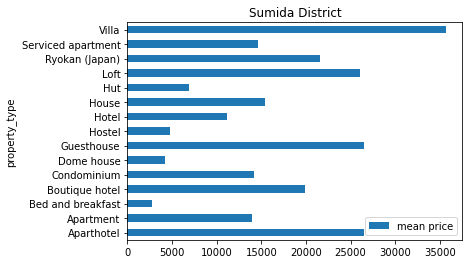

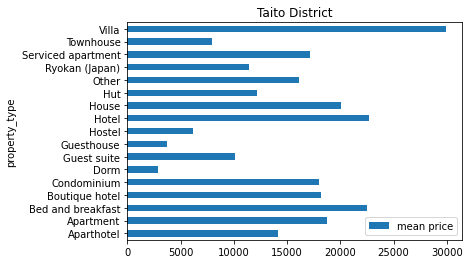

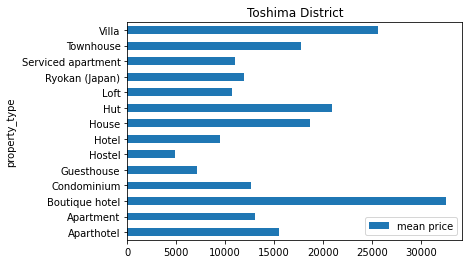

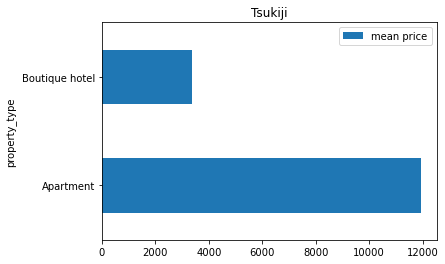

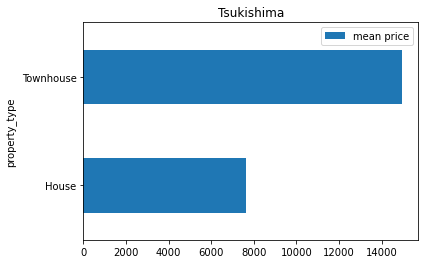

In [97]:
for group_name, _ in t:
    a=t.get_group(group_name)['mean price']
    b=t.get_group(group_name)['property_type']
    df = pd.DataFrame({'property_type':b,'mean price':a})
    df.plot.barh(x='property_type', y='mean price', rot=0)
    plt.title(group_name)
    del(a)
    del(b)
    del(df)
    

### Price prediction 

The following features have been considered to predict the price
1. host_id
2. latitude
3. longitude
4. property_type
5. bed_type
6. availability_365
7. minimum_nights
8. maximum_nights
9. neighbourhood
10. review_scores_rating

Now lets the see the percentage of null values in each features

In [16]:
print("% of null values in host_id features")
print(df.host_id.isnull().sum()/df.host_id.shape[0]*100)
print("% of null values in latitude features")
print(df.latitude.isnull().sum()/df.latitude.shape[0]*100)
print("% of null values in longitude features")
print(df.longitude.isnull().sum()/df.longitude.shape[0]*100)
print("% of null values in property_type features")
print(df.property_type.isnull().sum()/df.property_type.shape[0]*100)
print("% of null values in bed_type features")
print(df.bed_type.isnull().sum()/df.bed_type.shape[0]*100)
print("% of null values in availability_365 features")
print(df.availability_365.isnull().sum()/df.availability_365.shape[0]*100)
print("% of null values in minimum_nights features")
print(df.minimum_nights.isnull().sum()/df.minimum_nights.shape[0]*100)
print("% of null values in maximum_nights features")
print(df.maximum_nights.isnull().sum()/df.maximum_nights.shape[0]*100)
print("% of null values in neighbourhood features")
print(df.neighbourhood.isnull().sum()/df.neighbourhood.shape[0]*100)
print("%  of null values in review_scores_rating features")
print(df.review_scores_rating.isnull().sum()/df.review_scores_rating.shape[0]*100)

% of null values in host_id features
0.0
% of null values in latitude features
0.0
% of null values in longitude features
0.0
% of null values in property_type features
0.0
% of null values in bed_type features
0.0
% of null values in availability_365 features
0.0
% of null values in minimum_nights features
0.0
% of null values in maximum_nights features
0.0
% of null values in neighbourhood features
10.786684024549006
%  of null values in review_scores_rating features
13.632136879300724


In [68]:
clean_nulls = df[['host_id', 'latitude', 'longitude','property_type','bed_type','availability_365','neighbourhood','price']].dropna()
x = clean_nulls[['host_id', 'latitude', 'longitude','property_type','bed_type','availability_365','neighbourhood']]
y = clean_nulls['price']
y = y.str.replace('$','')
y = y.str.replace(',','')
y = y.apply(pd.to_numeric)
y

0         4153.0
1        11039.0
2         6995.0
3         4044.0
4        28527.0
          ...   
10748    12023.0
10749    26997.0
10750     6558.0
10751     6558.0
10753    25030.0
Name: price, Length: 9594, dtype: float64

In [21]:
print(type(y[1]))

<class 'str'>


In [69]:
#Encoding categorical features
cat_cols = ['property_type', 'bed_type','neighbourhood']
x = x.copy()
for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            x = pd.concat([x.drop(col, axis=1), pd.get_dummies(x[col], prefix=col, prefix_sep='_')], axis=1)
        except:
            continue
x

,host_id,latitude,longitude,availability_365,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,neighbourhood_Shimokitazawa,neighbourhood_Shinjuku,neighbourhood_Shinjuku District,neighbourhood_Shiodome,neighbourhood_Suginami District,neighbourhood_Sumida District,neighbourhood_Taito District,neighbourhood_Toshima District,neighbourhood_Tsukiji,neighbourhood_Tsukishima
0,151977,35.67152,139.71203,90,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,964081,35.71721,139.82596,51,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1573631,35.66344,139.65593,230,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,341577,35.74264,139.65832,217,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3667176,35.75281,139.71481,145,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,96751057,35.70283,139.69551,147,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10749,146576412,35.70546,139.81934,174,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10750,198552582,35.67148,139.73475,230,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10751,198552582,35.68771,139.68336,237,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=39) 

lm_model = Ridge(normalize=True) # Instantiate

lm_model.fit(X_train, y_train) #Fit
        
#Predict
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [76]:
print("The r-squared score for the model for train variables was {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
print("The r-squared score for the model for test variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

The r-squared score for the model for train variables was 0.025950900306147107 on 7675 values.
The r-squared score for the model for test variables was 0.031871149256966214 on 1919 values.
